#  時系列データの前処理

- **[3.1時系列データをpandasで扱う](#3.1-時系列データをpandasで扱う)**
    - **[3.1.1 データの読み込みと表示](#3.1.1-)**
    - **[3.1.2 日付データの変換](#3.1.2-)**
    - **[3.1.3 データの確認と表示](#3.1.3-)**
<br><br>
- **[3.2 時系列データを定常過程にする方法](#3.3-)**
    - **[3.2.1 トレンド成分・季節変動の除去](#3.3.1-)**
    - **[3.2.2 対数変換を用いる](#3.3.2-)**
    - **[3.2.3 移動平均を用いる](#3.3.3-)**
    - **[3.2.4 階差を用いる](#3.3.4-)**
    - **[3.2.5 季節調整を行う](#3.3.5-)**
<br><br>
- **[3.3 添削問題](#3.5-添削問題)**

## 3.1 時系列データをpandasで扱う

### 3.1.1 データの読み込みと表示

時系列データを分析するには与えられたデータに対して幾つかの処理を行わなければなりません。このセクションではCSV形式で与えられた時系列データの扱いについて学んでいきましょう。 <br>
まずは、データをpandasで読み込んで表示させてみます。
pandasの読み込みには`pd.read_csv()`引数に`filepath_or_buffer=`**"読み込み元のファイルのパスや URL を指定"**を用います。
読み込んだデータの先頭を調べたいときは`df.head(データ数)`、後尾を調べたいときには`df.tail(データ数)`を用います。

head, tailはそれぞれ先頭、後尾から５つのデータを取り出す関数でした。

#### 問題

- head, tailを用いてスパークリングワインの売上データについてCSVデータをpandasで読み込んで、その先頭5つと後尾5つのデータを表示させてください。
- csvデータの拡張子は".csv"です。

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
%matplotlib inline

# データの読み込みと整理
sales_sparkling = pd.read_csv(filepath_or_buffer = "https://aidemyexcontentsdata.blob.core.windows.net/data/5060_tsa/monthly-australian-wine-sales-th-sparkling.csv")

# 先頭5つのデータを表示、.head()を用いてください
print(#ここに答えを書き込んでください)
# 後尾5つのデータを表示、.tail()を用いてください
print(#ここに答えを書き込んでください

#### ヒント

- pandasの読み込みには`pd.read_csv("CSVデータファイル名")`を用います

- 読み込んだデータの先頭を調べたいときは`df.head(データ数)`、後尾を調べたいときには`df.tail(データ数)`を用います

#### 解答例

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
%matplotlib inline

# データの読み込みと整理
sales_sparkling = pd.read_csv(filepath_or_buffer = "https://aidemyexcontentsdata.blob.core.windows.net/data/5060_tsa/monthly-australian-wine-sales-th-sparkling.csv")

# 先頭5つのデータを表示
print(sales_sparkling.head(5))
# 後尾5つのデータを表示
print(sales_sparkling.tail(5))

***

### 3.1.2 時間情報をインデックスにする

時系列データを分析する際は時間情報(先程の例ですとMonthのデータ)をpandasのインデックス(先程の例では一番左端にある0, 1, 2 ......の部分)にすることでデータを扱いやすくします。
この加工は、

1.index情報を`pd.date_range("開始時", "終了時", freq="間隔")`にまとめる <br>
2.その情報をもとのデータのインデックスに代入する <br>
3.もとのデータの"Month"を削除する <br>

の手順で行います。
例えば、2017/1/1～2018/1/1の期間を日にち間隔で収集したい場合は、
pd.date_range("2017-01-01", "2018-01-01", freq = "D")の様に引数を渡しましょう。

freqには、収集したい間隔の頭文字を渡しましょう。
（second➡S, minute➡M, hour➡H, Day➡D, Month➡M）

"開始時"や"終了時"、"間隔"に関しては`df.head()`, `df.tail()`によって確認して決定します。

また今回のスパークリングワインのような月ごとのデータの場合は月末の日付を自分で設定したほうが扱いやすくなります。

#### 問題

- 先程読み込んだデータのインデックスに日付データを代入してください。
- "開始時"、"終了時’は前セクションも参考にしてください、"間隔"は"M"(月ごと)にしてください。
- "1980-01-31"から"1995-07-31"を指定してください

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
%matplotlib inline

# データの読み込みと整理
sales_sparkling = pd.read_csv(filepath_or_buffer = "https://aidemyexcontentsdata.blob.core.windows.net/data/5060_tsa/monthly-australian-wine-sales-th-sparkling.csv")


# インデックスデータの作成
index = pd.date_range(#ここに答えを書き込んでください,freq = "M")

# インデックスデータの代入
sales_sparkling.index = index

# "Month"カラムの削除
# ここに答えを書き込んでください

# データの表示    
print(sales_sparkling.head())

#### ヒント

- Monthカラムの削除は`del sales_sparkling["Month"]`で行われます
- インデックスデータの作成では月末日を設定します

#### 解答例

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
%matplotlib inline

# データの読み込みと整理
sales_sparkling = pd.read_csv(filepath_or_buffer = "https://aidemyexcontentsdata.blob.core.windows.net/data/5060_tsa/monthly-australian-wine-sales-th-sparkling.csv")
# インデックスデータの作成
index = pd.date_range("1980-01-31", "1995-07-31", freq = "M")
# インデックスデータの代入
sales_sparkling.index = index
# "Month"カラムの削除
del sales_sparkling["Month"]
# データの表示   
print(sales_sparkling.head())

***

### 3.1.3 折れ線グラフで表示

最後に整理したデータを折れ線グラフで表してみましょう

#### 問題

- いままで整理してきたスパークリングワインの売上データを折れ線グラフで表してください。
- ___の中に適切な変数を入れて折れ線グラフを出力してください。

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
%matplotlib inline

# データの読み込みと整理
sales_sparkling = pd.read_csv(filepath_or_buffer = "https://aidemyexcontentsdata.blob.core.windows.net/data/5060_tsa/monthly-australian-wine-sales-th-sparkling.csv")
# インデックスデータの作成
index = pd.date_range("1980-01-31", "1995-07-31", freq = "M")
# インデックスデータの代入
sales_sparkling.index = index
# "Month"カラムの削除
del sales_sparkling["Month"]

# データを折れ線グラフで表します
# グラフのタイトルを設定
plt.title("monthly-australian-wine-sales-th-sparkling")
# グラフのx軸とy軸の名前設定
plt.xlabel("date")
plt.ylabel("sales")

# データのプロット
# ここに答えを入力してください
plt.plot(_____)
plt.show()

#### ヒント

- 折れ線グラフの出力は`plt.plot(DATA)`でできます。

#### 解答例

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
%matplotlib inline

# データの読み込みと整理
sales_sparkling = pd.read_csv(filepath_or_buffer = "https://aidemyexcontentsdata.blob.core.windows.net/data/5060_tsa/monthly-australian-wine-sales-th-sparkling.csv")
# インデックスデータの作成
index = pd.date_range("1980-01-31", "1995-07-31", freq = "M")
# インデックスデータの代入
sales_sparkling.index = index
# "Month"カラムの削除
del sales_sparkling["Month"]


# データを折れ線グラフで表します
# グラフのタイトルを設定
plt.title("monthly-australian-wine-sales-th-sparkling")
# グラフのx軸とy軸の名前設定
plt.xlabel("date")
plt.ylabel("sales")
# データのプロット
plt.plot(sales_sparkling)
plt.show()

***

### 3.1.4 時系列データを非定常にしているもの

前チャプターで定常性の重要さについて説明しましたが、時系列データが定常性を持たないとき、その理由は何でしょうか。<br>
これには

・**トレンド**

・**季節変動**

の二つの要因が考えられます。<br>
**トレンド** に関しては定常性の条件である、期待値が一定という条件を思い出してみてください。もしもデータが正のトレンドを有していれば、その期待値も上昇傾向にあるため定常性があるとは言えません。

**季節変動** に関しては定常性の条件である自己相関係数(つまりデータの値の散らばり具合)が一定という条件を思い出してください。おでんのようにある時期において急激に売り上げの増加するような時系列データはこの条件を満たしません。

これらが、時系列データを非定常にしているのであればどのようにして非定常な時系列データを定常性ある時系列データに変換できるでしょうか。答えは簡単で、 **トレンド** 、 **季節変動** を取り除くような変換を行えばいいのです。

**トレンド** 、 **季節変動** を取り除き,時系列データを定常化した上で分析を行い、定常化したデータのモデルを構築する。そして再び **トレンド** や **季節変動** を合成することで原系列のモデルを構築する。ARIMAモデルは、このような流れで時系列データのモデリングを行います。(正確に言えば季節変動がある場合はSARIMAモデルと言われるモデルを扱います)

#### 問題

- 次の[]を埋める言葉の組み合わせを選んでください
- 時系列データを非定常にする要因は[]と[]である

1. トレンド,季節変動
1. トレンド,誤差
1. 誤差,季節変動
1. 階差,誤差

#### ヒント

- ARIMAモデルやSARIMAモデルの構築はトレンド、季節変動を取り除き,時系列データを定常化した上で分析を行い、定常化したデータのモデルを構築する。そして再びトレンドや季節変動を合成することで原系列のモデルを構築する、という流れで行われます。

#### 解答

1. トレンド,季節変動

***

## 3.2 時系列データを定常性にする方法

### 3.2.1 トレンド・季節変動の除去

時系列を定常過程にする方法は

**対数変換** によって、変動の **分散** を一様にしたり

**移動平均を取ることによってトレンドを推定した後に、トレンド成分を除去する**

**階差系列に変換することでトレンド・季節変動を除去する**

**季節調整を利用する**

などがあります。

#### 問題

- 時系列データを定常過程にする方法に当てはまるものはどれでしょうか

- 移動平均を取ることによってトレンドを推定した後に、トレンド成分を除去する
- 階差系列に変換することでトレンド・季節変動を除去する
- 季節調整を利用する
- 上記のすべて

#### ヒント

- トレンドと季節成分を除去することが時系列データを定常過程にする方法です。

#### 解答

上記のすべて

***

### 3.2.2 対数変換を用いる方法

　前も説明したように対数変換を行うことで、データの変動を穏やかにできます。対数をとることで、数字が大きければ大きいほど、小さめの数に結果が出力されるためです。<br>
つまり、変動の激しい時系列に対して自己共分散を一様にすることができます。
 
 実際に時系列を対数変換してみましょう。対数変換してもトレンドを除去できない場合はさらにトレンドを除去するなどしなくてはなりません。
 対数変換には`np.log()`を用います。


#### 問題

- 次の各年の太陽の黒点の数を表した時系列データを対数変換してみましょう

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
%matplotlib inline
import numpy as np

# データの読み込み
sunspots = sm.datasets.sunspots.load_pandas().data
sunspots.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
del sunspots["YEAR"]

# 対数変換
sunspots_log = #ここに書き込んでください

# 対数変換後のグラフ
plt.title("Sunspots")
plt.xlabel("date")
plt.ylabel("sunspots_log")
plt.plot(sunspots_log)
plt.show()

#### ヒント

- 対数変換には`np.log`を用います

#### 解答例

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
%matplotlib inline

import numpy as np
# データの読み込み
sunspots = sm.datasets.sunspots.load_pandas().data
sunspots.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
del sunspots["YEAR"]
# 対数変換
sunspots_log = np.log(sunspots)
# 対数変換後のグラフ
plt.title("Sunspots")
plt.xlabel("date")
plt.ylabel("sunspots_log")
plt.plot(sunspots_log)
plt.show()

***

### 3.2.3 移動平均を用いる

　移動平均をとるには、k個の連続する値の平均値をとります。
 
 移動平均とは時系列データのある一定の区間で”平均”をとる、ということを区間を”移動”させながら繰り返すことです。
 
 こうすることで、元のデータの特徴を残しつつ、データを滑らかにすることができます。
 
 例えば月ごとのデータに季節変動がある場合、12個の連続する値の移動平均を求めることで、季節変動を除去することができトレンド成分を抽出することができます。

　次に、もとめた移動平均をもとの系列から引き算します。こうすることで系列のトレンド成分を除去することができます。

#### 問題

- マウナロア観測所のCO2濃度のデータについて、51週間ごと(ちょうど一年間)の移動平均をとり、トレンドを確認してみましょう。
- また、原系列から移動平均を引いたデータが定常過程に近づいていることを確認してください。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
%matplotlib inline
import numpy as np

co2_tsdata = sm.datasets.co2.load_pandas().data
# 欠損値の処理
co2_tsdata2 = co2_tsdata.fillna(method="ffill")
# 原系列のグラフ
plt.subplot(6, 1, 1)
plt.xlabel("date")
plt.ylabel("co2")
plt.plot(co2_tsdata2)
# 移動平均を求める
co2_moving_avg = co2_tsdata2.rolling(window=51).mean()
# 移動平均のグラフ
plt.subplot(6, 1, 3)
plt.xlabel("date")
plt.ylabel("co2")
plt.plot(co2_moving_avg)
# 原系列-移動平均グラフ
plt.subplot(6, 1, 5)
plt.xlabel("date")
plt.ylabel("co2")
mov_diff_co2_tsdata = co2_tsdata2-co2_moving_avg 
plt.plot(mov_diff_co2_tsdata)
plt.show()
# 何も書き込まず実行してください

#### ヒント

- 移動平均は`DATA.rolling(window=何個分の移動平均をとるか).mean()`によって求めることができます

#### 解答

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
%matplotlib inline
import numpy as np

co2_tsdata = sm.datasets.co2.load_pandas().data
# 欠損値の処理
co2_tsdata2 = co2_tsdata.fillna(method="ffill")
# 原系列のグラフ
plt.subplot(6, 1, 1)
plt.xlabel("date")
plt.ylabel("co2")
plt.plot(co2_tsdata2)
# 移動平均を求める
co2_moving_avg = co2_tsdata2.rolling(window=51).mean()
# 移動平均のグラフ
plt.subplot(6, 1, 3)
plt.xlabel("date")
plt.ylabel("co2")
plt.plot(co2_moving_avg)
# 原系列-移動平均グラフ
plt.subplot(6, 1, 5)
plt.xlabel("date")
plt.ylabel("co2")
mov_diff_co2_tsdata = co2_tsdata2-co2_moving_avg 
plt.plot(mov_diff_co2_tsdata)
plt.show()
# 何も書き込まず実行してください

***

### 3.2.4 階差をとる

前チャプターで学んだ階差系列への変換は定常性を持たせるために用いられる最も一般的な方法です。
階差を取ることでトレンドと季節変動を除去することができます。

階差系列は、時系列データの中の隣り合うデータ同士で引き算していった系列のことでした。<br>
例えば`[1, 5, 3, 5, 3, 2, 2, 9]`という時系列データの階差系列は`[4, -2, 2, -2, -1, 0, 7]`です。

1次の階差は`DATA.diff()`によって求められます。

もし、生成した階差系列からさらに階差系列をとると２次の階差系列ということになります。

#### 問題

- マウナロア観測所の二酸化炭素濃度のデータを1階差系列に変換して、原系列が定常過程に近づいていることを確認してみましょう。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
%matplotlib inline
import numpy as np

co2_tsdata = sm.datasets.co2.load_pandas().data
# 欠損値の処理
co2_tsdata2 = co2_tsdata.fillna(method="ffill")
# 原系列のプロット
plt.subplot(2, 1, 1)
plt.xlabel("date")
plt.ylabel("co2")
plt.plot(co2_tsdata2)
# 階差をとる
plt.subplot(2, 1, 2)
plt.xlabel("date")
plt.ylabel("co2_diff")

co2_data_diff = #ここに書き込んでください

# 階差系列のプロット
plt.plot(co2_data_diff)
plt.show()

#### ヒント

- 1次の階差は`DATA.diff()`によって求められます。

#### 解答例

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
%matplotlib inline
import numpy as np

co2_tsdata = sm.datasets.co2.load_pandas().data
# 欠損値の処理
co2_tsdata2 = co2_tsdata.fillna(method="ffill")
# 原系列のプロット
plt.subplot(2, 1, 1)
plt.xlabel("date")
plt.ylabel("co2")
plt.plot(co2_tsdata2)
# 階差をとる
plt.subplot(2, 1, 2)
plt.xlabel("date")
plt.ylabel("co2_diff")
co2_data_diff = co2_tsdata2.diff()
# 階差系列のプロット
plt.plot(co2_data_diff)
plt.show()

***

### 3.2.5 季節調整の利用

前チャプターで階差系列について学びました。そのときは原系列をトレンド、季節変動、残差に分けました。
この変換は <br>
(原系列 = トレンド + 季節変動 + 残差) <br>
のように表されますからこの式を変換して <br>
原系列 - トレンド - 季節変動 = 残差 <br>
となります。つまり残差はトレンドと季節変動が取り除かれた定常性のある時系列データになっています。
その残差が定常過程になっているを確認してください

#### 問題

- マウナロアの二酸化炭素濃度のデータをトレンド、季節変動、残差に分けて残差データが定常過程に近づいていることを確認してください。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
%matplotlib inline
import numpy as np
# データの読み込み
co2_tsdata = sm.datasets.co2.load_pandas().data
# 欠損値の処理
co2_tsdata2 = co2_tsdata.dropna()
# 季節調整とグラフのプロット
res = sm.tsa.seasonal_decompose(co2_tsdata2,freq=51)
fig = res.plot()
plt.show()
# 何も書き込まず実行してください

#### ヒント

- 残差データはトレンド成分や季節成分が除去されます。

#### 解答例

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


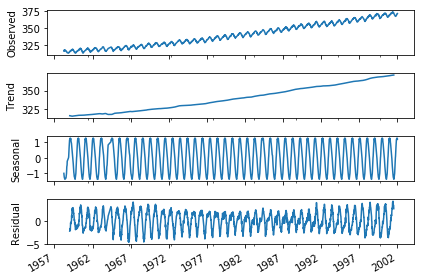

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
%matplotlib inline
import numpy as np
# データの読み込み
co2_tsdata = sm.datasets.co2.load_pandas().data
# 欠損値の処理
co2_tsdata2 = co2_tsdata.dropna()
# 季節調整とグラフのプロット
res = sm.tsa.seasonal_decompose(co2_tsdata2,freq=51)
fig = res.plot()
plt.show()
# 何も書き込まず実行してください

***

## 3.3 添削問題

#### 問題

- スパークリングワインの売上データを読み込んだのち、整理して、季節調整を行って残差を表示させましょう。

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
%matplotlib inline

#データの読み込みと整理
#ここに答えを書き込んでください

#インデックスデータの作成
#ここに答えを書き込んでください

#インデックスデータの代入
#ここに答えを書き込んでください

#"Month"カラムの削除
#ここに答えを書き込んでください

#データを折れ線グラフで表します
# グラフのタイトルを設定
plt.title("monthly-australian-wine-sales-th-sparkling-Resid")
# グラフのx軸とy軸の名前設定
plt.xlabel("date")
plt.ylabel("sales-Resid")

#季節調整を行います
res = #ここに答えを書き込んでください

#残差を折れ線グラフで表します
#ここに答えを書き込んでください

#### ヒント

- 季節調整の際`freq=12`としましょう。
- 残差の出力は`plt.plot(res.resid)`で行うことができます。

#### 解答例

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
%matplotlib inline

# データの読み込みと整理
sales_sparkring = pd.read_csv("monthly-australian-wine-sales-th-sparkling.csv")
# インデックスデータの作成
index = pd.date_range("1980-01-31", "1995-07-31", freq = "M")
# インデックスデータの代入
sales_sparkring.index = index
# "Month"カラムの削除
del sales_sparkring["Month"]

# データを折れ線グラフで表します
# グラフのタイトルを設定
plt.title("monthly-australian-wine-sales-th-sparkling-Resid")
# グラフのx軸とy軸の名前設定
plt.xlabel("date")
plt.ylabel("sales-Resid")

#　季節調整を行います
res = sm.tsa.seasonal_decompose(sales_sparkring, freq=12)
#　残差を折れ線グラフで表します
plt.plot(res.resid)

#### 解説

コメントが各コードの解説になっています。
```python
#データの読み込みと整理
sales_sparkring = pd.read_csv("monthly-australian-wine-sales-th-sparkling.csv")
#インデックスデータの作成
index = pd.date_range("1980-01-31", "1995-07-31", freq = "M")
#インデックスデータの代入
sales_sparkring.index = index
#"Month"カラムの削除
del sales_sparkring["Month"]

#データを折れ線グラフで表します
# グラフのタイトルを設定
plt.title("monthly-australian-wine-sales-th-sparkling-Resid")
# グラフのx軸とy軸の名前設定
plt.xlabel("date")
plt.ylabel("sales-Resid")

#季節調整を行います
res = sm.tsa.seasonal_decompose(sales_sparkring, freq=12)
#残差を折れ線グラフで表します
plt.plot(res.resid)```

***